# Logistic REgression with ROC curve and ROC AUC score
most of the time, the Threshold is kept `0.5` but if we want to change this threshold, we can do this by changing the ROC curve and ROC AUC score

In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
X

array([[-2.04582165, -0.13791624, -0.08071423, ...,  2.48194524,
         0.74236675,  0.23154789],
       [-0.98726024,  1.30120189,  2.37734888, ...,  0.55445754,
        -0.21892143, -0.37608578],
       [ 0.57335921,  0.09375582,  0.4662521 , ..., -0.6088508 ,
         0.79903499, -0.17121177],
       ...,
       [-0.70737159,  1.07650943,  0.58510456, ..., -1.51337602,
         0.90239871, -0.69230951],
       [-0.20706849,  1.17319848, -1.94478665, ..., -0.32820676,
         1.5711921 ,  1.14877729],
       [-2.16769231, -2.54871672,  2.89359255, ...,  0.71535366,
         0.34329241,  1.07350284]], shape=(1000, 20))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# generate a no skill prediction (majority class)
# this is a dummy model, with default value as 0
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
# Prediction on the basis of probability
model_proba = model.predict_proba(X_test)
model_proba

array([[9.58298182e-01, 4.17018181e-02],
       [3.55341633e-01, 6.44658367e-01],
       [4.72725089e-01, 5.27274911e-01],
       [1.34550546e-01, 8.65449454e-01],
       [3.92399823e-01, 6.07600177e-01],
       [5.91921961e-01, 4.08078039e-01],
       [7.01014913e-02, 9.29898509e-01],
       [7.45006434e-01, 2.54993566e-01],
       [9.41996426e-01, 5.80035745e-02],
       [9.71650636e-01, 2.83493641e-02],
       [1.24872370e-01, 8.75127630e-01],
       [5.35036220e-01, 4.64963780e-01],
       [1.84127512e-01, 8.15872488e-01],
       [9.70304473e-01, 2.96955268e-02],
       [2.10451467e-01, 7.89548533e-01],
       [6.20555264e-01, 3.79444736e-01],
       [6.15736509e-01, 3.84263491e-01],
       [9.93383491e-01, 6.61650880e-03],
       [6.14335894e-01, 3.85664106e-01],
       [9.88031141e-01, 1.19688591e-02],
       [9.79538620e-01, 2.04613805e-02],
       [4.54119996e-02, 9.54588000e-01],
       [7.98673645e-01, 2.01326355e-01],
       [2.86887056e-02, 9.71311294e-01],
       [2.171806

In [11]:
# let's keep probabilities for the positive outcome only
model_proba = model_proba[:, 1]
model_proba

array([4.17018181e-02, 6.44658367e-01, 5.27274911e-01, 8.65449454e-01,
       6.07600177e-01, 4.08078039e-01, 9.29898509e-01, 2.54993566e-01,
       5.80035745e-02, 2.83493641e-02, 8.75127630e-01, 4.64963780e-01,
       8.15872488e-01, 2.96955268e-02, 7.89548533e-01, 3.79444736e-01,
       3.84263491e-01, 6.61650880e-03, 3.85664106e-01, 1.19688591e-02,
       2.04613805e-02, 9.54588000e-01, 2.01326355e-01, 9.71311294e-01,
       9.78281940e-01, 8.29935208e-01, 5.06060437e-01, 4.42270008e-02,
       1.07461726e-02, 9.81422226e-01, 9.35456247e-01, 9.08188945e-01,
       3.09412540e-02, 9.12818295e-01, 3.23196650e-01, 3.05680173e-01,
       2.19477089e-02, 8.68340486e-01, 1.09090534e-01, 8.82754546e-01,
       4.60686559e-01, 9.59991576e-01, 5.57915065e-01, 5.86771666e-01,
       4.94237167e-01, 9.89333090e-03, 8.81415396e-03, 7.23701908e-01,
       5.55737463e-03, 8.22592012e-01, 8.53725797e-01, 9.24701509e-01,
       9.52888534e-01, 8.84323151e-01, 1.96186560e-01, 5.89695091e-02,
      

In [14]:
# let's calculate ROC AUC scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_proba)
print('No Skill Model ROC AUC = %.3f' % (dummy_model_auc))
print('Logistic Regression ROC AUC = %.3f' % (model_auc))

No Skill Model ROC AUC = 0.500
Logistic Regression ROC AUC = 0.918


In [24]:
# caluclate ROC curves
dummy_model_fpr, dummy_model_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_proba)

In [25]:
threshold

array([           inf, 9.99530087e-01, 9.29898509e-01, 9.27121334e-01,
       9.13349894e-01, 9.12818295e-01, 9.05804133e-01, 9.05785350e-01,
       9.00963422e-01, 8.97490557e-01, 8.77610803e-01, 8.75127630e-01,
       8.65449454e-01, 8.60730519e-01, 8.37556306e-01, 8.34169215e-01,
       7.89548533e-01, 7.80284186e-01, 7.49538413e-01, 7.41697127e-01,
       7.19847332e-01, 7.17868415e-01, 7.11687710e-01, 7.04505129e-01,
       6.79615070e-01, 6.78583385e-01, 5.96027693e-01, 5.72320353e-01,
       5.46631482e-01, 5.29425620e-01, 5.06060437e-01, 5.05928706e-01,
       4.85591832e-01, 4.79169256e-01, 4.76489646e-01, 4.64963780e-01,
       4.33979252e-01, 4.32341054e-01, 4.32128194e-01, 4.20010750e-01,
       4.08747355e-01, 4.08078039e-01, 3.95483235e-01, 3.85664106e-01,
       3.84263491e-01, 3.79444736e-01, 3.65776117e-01, 2.77882128e-01,
       2.73720664e-01, 2.25307030e-01, 2.23606727e-01, 2.11690429e-01,
       2.10045198e-01, 1.90951807e-01, 1.81290355e-01, 1.41962029e-01,
      

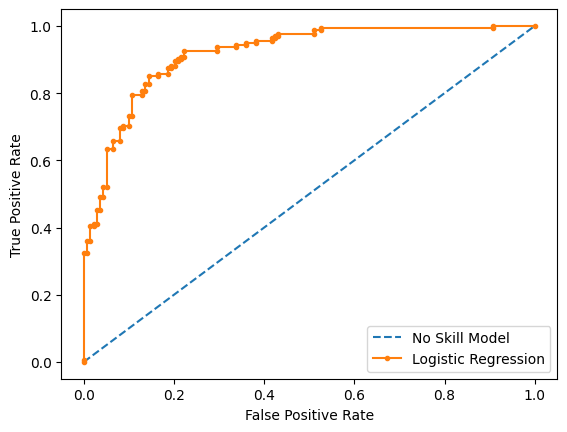

In [18]:
# plot the ROC curves for the models
plt.plot(dummy_model_fpr, dummy_model_tpr, linestyle='--', label='No Skill Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

/var/folders/st/zp6j91vd15g43klkwjs9m7s00000gn/T/ipykernel_20706/3148019413.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


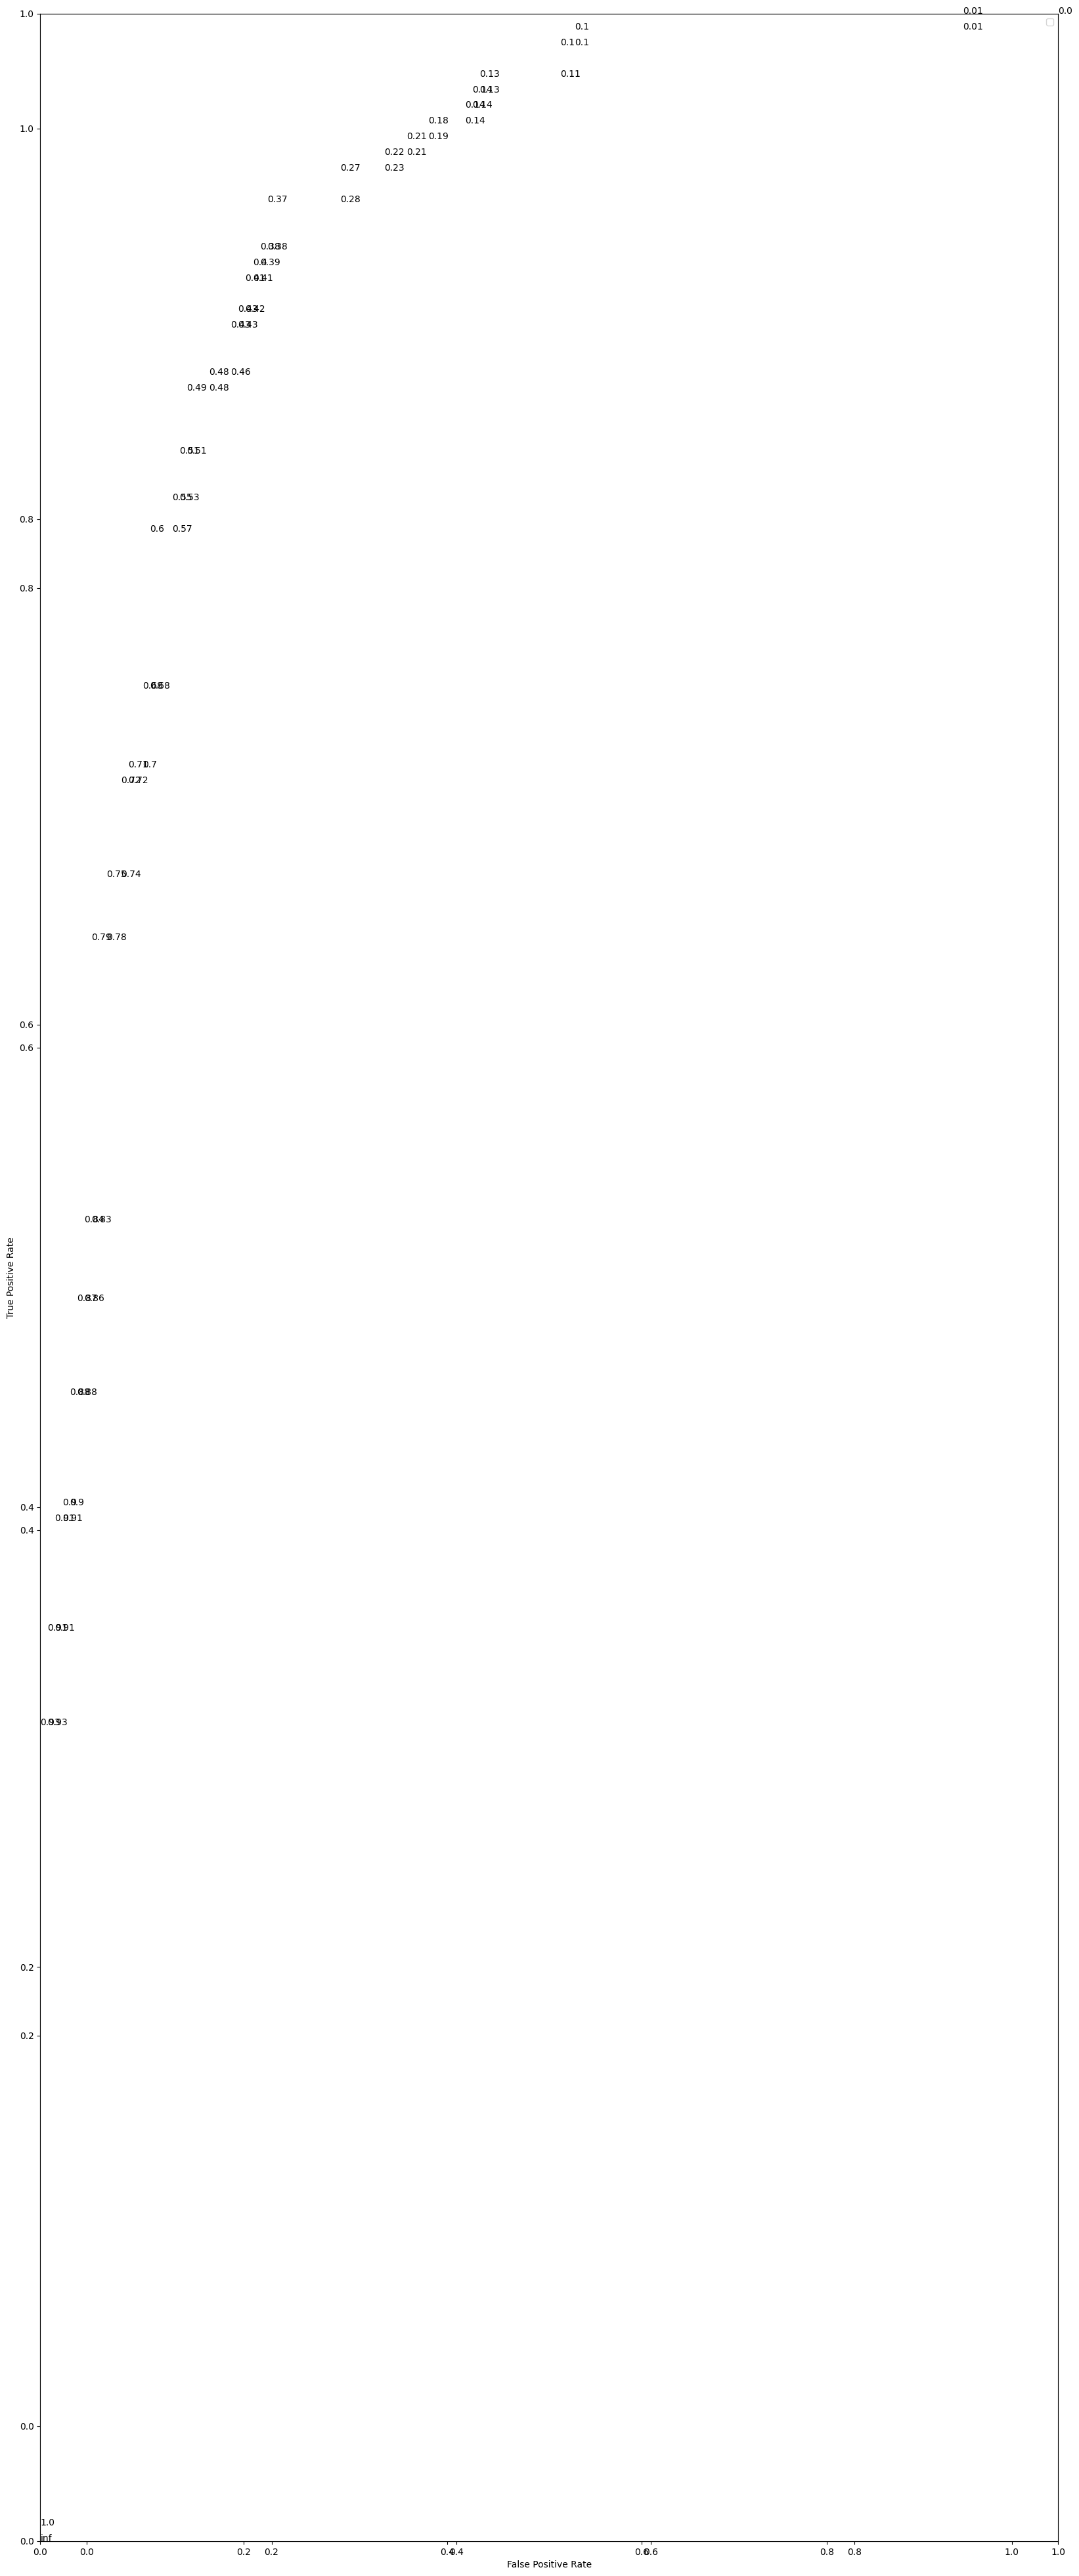

In [27]:
import numpy as np
fig = plt.figure(figsize=(20, 50))
# plot the ROC curves for the models
plt.plot(dummy_model_fpr, dummy_model_tpr, linestyle='--', label='No Skill Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, threshold):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0], xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()